# Tugas KBS Data Science
## II4042 AI for Business
## KBS untuk rumah123.com
### Oleh
18219006 Marcelino Feihan

18219014 Zarfa Naida Pratista

18219058 Afif Fahreza


## Daftar Isi

1. [Business Understanding](#1)  
1.1 [Menentukan Masalah Bisnis](#1-1)  
1.2 [Menentukan Tugas Analytics](#1-2)  
1.3 [Menentukan Kebutuhan Data](#1-3)  
1.4 [Merencanakan Manajemen Proyek](#1-4)  
2. [Data Understanding](#2)  
2.1 [Mengumpulkan Data](#2-1)  
2.2 [Menelaah Data](#2-2)  
2.3 [Memvalidasi Data](#2-3)  
3. [Data Preparation](#3)  
3.1 [Memilih dan Memilah data](#3-1)  
3.2 [Membersihkan Data](#3-2)  
3.3 [Mengkonstruksi Data](#3-3)  
3.4 [Integrasi Data](#3-4)  
4. [Modeling](#4)  
4.1 [Membangun Skenario Pemodelan](#4-1)  
4.2 [Membangun Model](#4-2)  
5. [Model Evaluation](#5)  
5.1 [Mengevaluasi Model](#5-1)  
5.2 [Mengevaluasi Proses](#5-2)  
6. [Deployment](#6)  
7. [Project Evaluation](#7)


## 1. Business Understanding <a class="anchor" id="1"></a>

### 1.1 Menentukan Masalah Bisnis <a class="anchor" id="1-1"></a>
**Permasalahan**  
Orang-orang yang masih awam terhadap bidang properti masih kesulitan menentukan harga properti yang berpeluang baik untuk investasi sehingga tidak banyak menggunakan situs ini.  

**Pertanyaan**  
Bagaimana agar orang yang awam properti tetap bisa mendapatkan untuk saat menggunakan situs untuk berinvestasi properti?  

**Measurable Outcomes**  
Persentase kenaikan jumlah listing properti dari situs rumah123.com  

### 1.2 Menentukan Tugas Analytics <a class="anchor" id="1-2"></a>
Sistem akan memberikan prediksi harga properti, sehingga tugas analytics yang digunakan adalah **regresi** dengan pengetesan menggunakan performance matrix **mean absolute error (MAE)**, **mean squared error (MSE)**, dan **koefisien deteminasi (R-Squared)**.  

### 1.3 Menentukan Kebutuhan Data <a class="anchor" id="1-3"></a>
Data didapat dari web scraping rumah123.com, dengan menggunakan web scraper pada link GitHub repository [berikut](https://github.com/tugusav/Rumah123-Data-Analysis)  
Data-data yang dipakai adalah harga properti, lokasi properti, luas tanah properti, dan banyaknya ruangan pada properti.

### 1.4 Merencanakan Manajemen Proyek <a class="anchor" id="1-4"></a>
**Impact-Effort Matrix**  

<img src="img/1.png" alt="IEM" width="480" height="270">

**Cost Benefit Analysis**  

<img src="img/2.png" alt="CBA" width="480" height="270">

**Langkah Penyelesaian Masalah**  

<img src="img/3.png" alt="LPM" width="480" height="270">

## 2. Data Understanding <a class="anchor" id="2"></a>
Tahapan untuk mengenal data yang dikumpulkan

### 2.1 Mengumpulkan Data <a class="anchor" id="2-1"></a>

Import Library yang dibutuhkan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

Membaca data dari file CSV dan menampilkan data

In [3]:
data = pd.read_csv("data.csv")
data.head()

,property_title,property_agent,location,latitude,longitude,phone_number,property_type,land_area,building_area,price_idr,num_bathroom,num_bedroom,garage_capacity
0,Perumahan Annieland Balaraja Cisoka Rumah Siap...,Independent Property Agent,"Cisoka, Tangerang",-6.269770,106.433003,6.281839e+10,Rumah,60,36,1.680000e+08,1,2,1
1,Rumah Mewah 2 Lantai Termurah Di Jabodetabek,Independent Property Agent,"Bukit Sentul, Bogor",-6.618206,106.879065,6.208950e+13,Rumah,80,90,7.850000e+08,2,3,2
2,Perumahan Muslim Segera Survey Banyak Kejutan ...,K-Pro,"Kalisari, Jakarta Timur",-6.336080,106.852973,6.281116e+11,Rumah,91,105,1.470000e+09,4,4,1
3,Dijual rumah murah di Dago lokasi strategis da...,Onasis Property Bandung,"Dago, Bandung",-6.904979,107.610479,8.129633e+10,Rumah,60,90,1.170000e+09,2,3,0
4,Rumah minimalis deket stasiun tambun,JPI Propertindo Ps. Minggu,"Tambun Selatan, Bekasi",-6.272237,107.066368,6.283806e+12,Rumah,60,36,3.450000e+08,1,2,1


Melihat jumlah data

In [4]:
data.count()

property_title     1905
property_agent     1905
location           1905
latitude           1905
longitude          1905
phone_number       1905
property_type      1905
land_area          1905
building_area      1905
price_idr          1904
num_bathroom       1905
num_bedroom        1905
garage_capacity    1905
dtype: int64

Melihat deskripsi data

In [5]:
data.describe()

,latitude,longitude,phone_number,land_area,building_area,price_idr,num_bathroom,num_bedroom,garage_capacity
count,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1.904000e+03,1905.000000,1905.000000,1905.000000
mean,-6.237583,108.395957,6.173921e+12,262.248294,245.041995,6.546773e+09,3.149606,3.827822,1.037795
std,2.015168,3.242746,2.536896e+13,532.971784,292.609059,1.722171e+10,3.559397,4.479501,1.749742
min,-8.803908,98.629259,6.281700e+04,1.000000,3.000000,3.500000e+06,1.000000,1.000000,0.000000
25%,-6.886021,106.783388,6.285689e+11,75.000000,70.000000,8.330000e+08,2.000000,3.000000,0.000000
50%,-6.302001,106.857134,6.281312e+12,128.000000,150.000000,2.200000e+09,3.000000,3.000000,1.000000
75%,-6.205258,107.611368,6.282124e+12,280.000000,300.000000,5.462500e+09,4.000000,4.000000,2.000000
max,42.645087,124.835888,6.262813e+14,8870.000000,3500.000000,3.500000e+11,62.000000,116.000000,41.000000


### 2.2 Menelaah Data <a class="anchor" id="2-2"></a>

Kita telah mendapatkan banyak informasi dari deskripsi data di atas. Contohnya seperti luas bangunan minimum sebesar 3 dan maksismum sebesar 3500. Kita dapat melihat bahwa data tersebut terdistribusi. Sekarang, kita akan melakukan visualisasi untuk beberapa atribut data untuk mendapatkan lebih banyak informasi.

**KARAKTERISTIK ATRIBUT**

Pertama, kita akan melihat visualisasi lokasi properti dari atribut data latitude dan longitude

<Figure size 7200x7200 with 0 Axes>

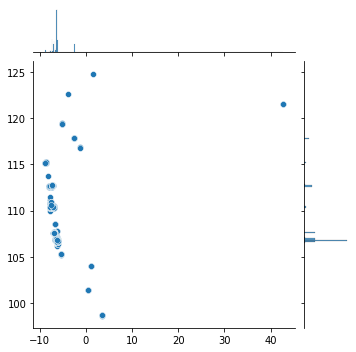

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [6]:
plt.figure(figsize=(100,100))
sns.jointplot(x=data.latitude.values, y=data.longitude.values, height=5)
plt.xlabel('Latitude',fontsize=12)
plt.ylabel('Longitude',fontsize=12)
plt.show()
sns.despine

Kita dapat melihat kebanyakan rumah berada pada latitude -10 sampai 0 dan longitude 105 sampai 115

Selanjutnya, kita akan melihat visualisasi persebaran harga dari properti

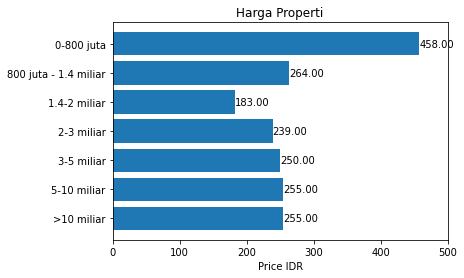

In [7]:
dataLabel = ['0-800 juta', '800 juta - 1.4 miliar', '1.4-2 miliar', '2-3 miliar', '3-5 miliar', '5-10 miliar', '>10 miliar']
dataCount = [0, 0, 0, 0, 0, 0, 0]

for price in data['price_idr']:
    if price < 800000000:
        dataCount[0] += 1
    elif price >= 800000000 and price < 1400000000:
        dataCount[1] += 1
    elif price >= 1400000000 and price < 2000000000:
        dataCount[2] += 1
    elif price >= 2000000000 and price < 3000000000:
        dataCount[3] += 1
    elif price >= 3000000000 and price < 5000000000:
        dataCount[4] += 1
    elif price >= 5000000000 and price < 10000000000:
        dataCount[5] += 1
    elif price >= 10000000000:
        dataCount[6] += 1

fig, ax = plt.subplots()
y_pos = np.arange(len(dataLabel))
hbars = ax.barh(y_pos, dataCount, align='center')
ax.set_yticks(y_pos, labels=dataLabel)
ax.invert_yaxis()
ax.set_xlabel('Price IDR')
ax.set_title('Harga Properti')

ax.bar_label(hbars, fmt='%.2f')
ax.set_xlim(right=500) 

plt.show()

Kita dapat melihat bahwa kebanyakan harga properti berada di rentang 0-800 juta rupiah.

Selanjutnya, kita akan melihat persebaran jumlah ruangan (kamar, kamar mandi, dan garasi) yang ada

<AxesSubplot:title={'center':'Persebaran Jumlah Kamar'}>

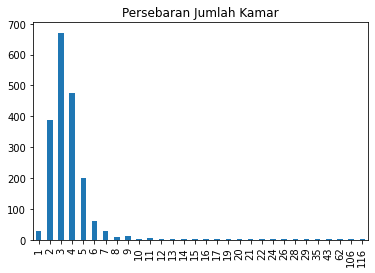

In [8]:
data['num_bedroom'].value_counts(dropna=True).sort_index().plot(kind="bar",x='num_bedroom',y='counts',title="Persebaran Jumlah Kamar")

Kita dapat melihat bahwa kebanyakan properti yang dijual memiliki 3 atau 4 kamar

<AxesSubplot:title={'center':'Persebaran Jumlah Kamar Mandi'}>

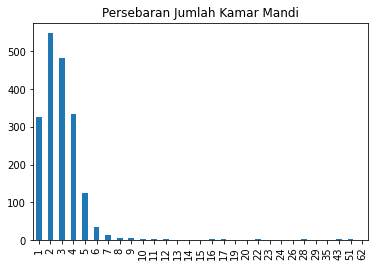

In [9]:
data['num_bathroom'].value_counts(dropna=True).sort_index().plot(kind="bar",x='num_bathroom',y='counts',title="Persebaran Jumlah Kamar Mandi")

Kita dapat melihat bahwa kebanyakan properti yang dijual memiliki 2 sampai 3 kamar mandi

<AxesSubplot:title={'center':'Persebaran Jumlah Garasi'}>

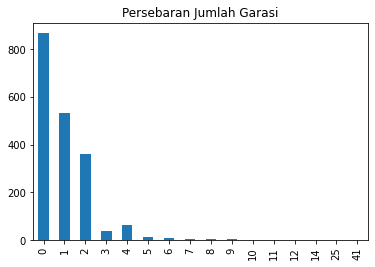

In [10]:
data['garage_capacity'].value_counts(dropna=True).sort_index().plot(kind="bar",x='garage_capacity',y='counts',title="Persebaran Jumlah Garasi")

Kita dapat melihat bahwa kebanyakan properti yang dijual tidak memiliki garasi atau hanya berkapasitas 1

Selanjutnya, kita akan melihat persebaran luas tanah dan luas bangunan dari properti

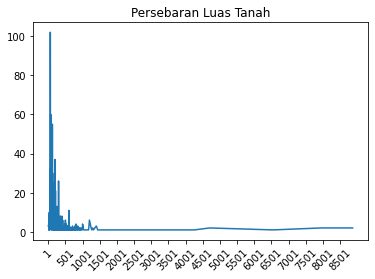

In [11]:
fig, ax = plt.subplots()
ax.plot(data['land_area'].value_counts().sort_index())
ax.set_title("Persebaran Luas Tanah")
plt.xticks(np.arange(min(data['land_area']), max(data['land_area']), 500),rotation=45)
plt.show()

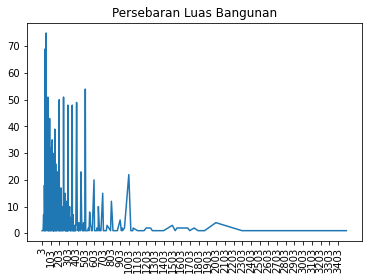

In [12]:
fig, ax = plt.subplots()
ax.plot(data['building_area'].value_counts().sort_index())
ax.set_title("Persebaran Luas Bangunan")
plt.xticks(np.arange(min(data['building_area']), max(data['building_area']), 100),rotation=90)
plt.show()

Kita dapat melihat bahwa kebanyakan properti memiliki luas tanah 1-501 dan luas bangunan 3-403

Selanjutnya, kita akan melihat hubungan-hubungan atribut tadi dengan harga properti

**KETERKAITAN ANTAR DATA**

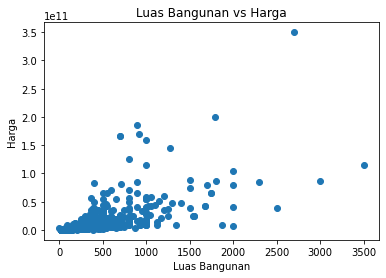

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [13]:
plt.scatter(data.building_area, data.price_idr)
plt.title("Luas Bangunan vs Harga")
plt.xlabel("Luas Bangunan")
plt.ylabel("Harga")
plt.show()
sns.despine


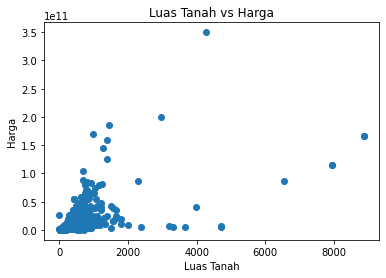

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [14]:
plt.scatter(data.land_area, data.price_idr)
plt.title("Luas Tanah vs Harga")
plt.xlabel("Luas Tanah")
plt.ylabel("Harga")
plt.show()
sns.despine

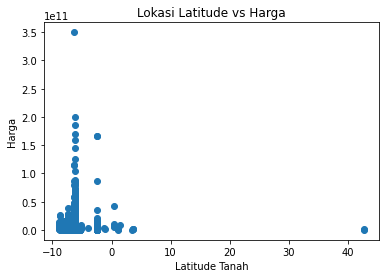

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [15]:
plt.scatter(data.latitude, data.price_idr)
plt.title("Lokasi Latitude vs Harga")
plt.xlabel("Latitude Tanah")
plt.ylabel("Harga")
plt.show()
sns.despine

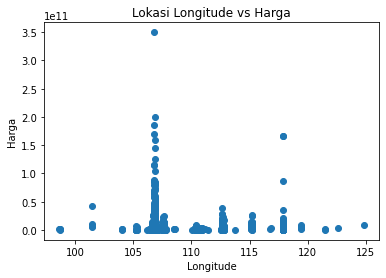

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [16]:
plt.scatter(data.longitude, data.price_idr)
plt.title("Lokasi Longitude vs Harga")
plt.xlabel("Longitude")
plt.ylabel("Harga")
plt.show()
sns.despine

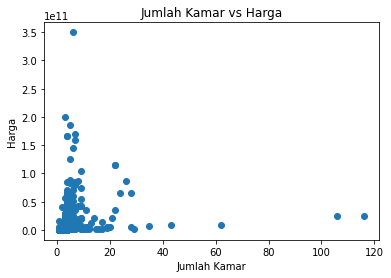

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [17]:
plt.scatter(data.num_bedroom, data.price_idr)
plt.title("Jumlah Kamar vs Harga")
plt.xlabel("Jumlah Kamar")
plt.ylabel("Harga")
plt.show()
sns.despine

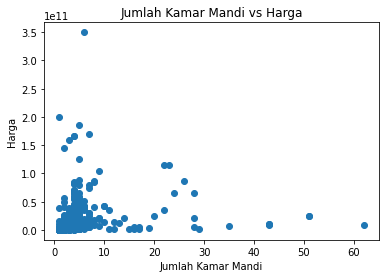

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [18]:
plt.scatter(data.num_bathroom, data.price_idr)
plt.title("Jumlah Kamar Mandi vs Harga")
plt.xlabel("Jumlah Kamar Mandi")
plt.ylabel("Harga")
plt.show()
sns.despine

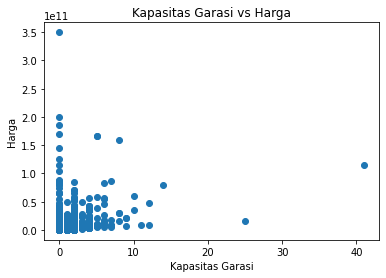

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [19]:
plt.scatter(data.garage_capacity, data.price_idr)
plt.title("Kapasitas Garasi vs Harga")
plt.xlabel("Kapasitas Garasi")
plt.ylabel("Harga")
plt.show()
sns.despine

### 2.3 Memvalidasi Data <a class="anchor" id="2-3"></a>

Kualitas data sudah sesuai untuk memprediksi harga properti berdasarkan lokasi, luas area properti, dan jumlah ruangan pada properti

## 3. Data Preparation <a class="anchor" id="3"></a>

### 3.1 Memilih dan Memilah data <a class="anchor" id="3-1"></a>
Atribut yang terpakai adalah price_idr, latitude, longitude, building_area, land_area, num_bedroom, num_bathroom, dan garage_capacity

In [20]:
df = data[['price_idr', 'latitude', 'longitude', 'building_area', 'land_area', 'num_bedroom', 'num_bathroom', 'garage_capacity']]
df.describe()

,price_idr,latitude,longitude,building_area,land_area,num_bedroom,num_bathroom,garage_capacity
count,1.904000e+03,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000,1905.000000
mean,6.546773e+09,-6.237583,108.395957,245.041995,262.248294,3.827822,3.149606,1.037795
std,1.722171e+10,2.015168,3.242746,292.609059,532.971784,4.479501,3.559397,1.749742
min,3.500000e+06,-8.803908,98.629259,3.000000,1.000000,1.000000,1.000000,0.000000
25%,8.330000e+08,-6.886021,106.783388,70.000000,75.000000,3.000000,2.000000,0.000000
50%,2.200000e+09,-6.302001,106.857134,150.000000,128.000000,3.000000,3.000000,1.000000
75%,5.462500e+09,-6.205258,107.611368,300.000000,280.000000,4.000000,4.000000,2.000000
max,3.500000e+11,42.645087,124.835888,3500.000000,8870.000000,116.000000,62.000000,41.000000


### 3.2 Membersihkan Data <a class="anchor" id="3-2"></a>

Memperbaiki kualitas data dengan menghilangkan rekord dengan atribut null

In [21]:
df = df.dropna()
df.describe()

,price_idr,latitude,longitude,building_area,land_area,num_bedroom,num_bathroom,garage_capacity
count,1.904000e+03,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.000000,1904.00000
mean,6.546773e+09,-6.237230,108.396386,244.986870,262.296744,3.826681,3.149160,1.03834
std,1.722171e+10,2.015639,3.243544,292.676035,533.107604,4.480401,3.560279,1.75004
min,3.500000e+06,-8.803908,98.629259,3.000000,1.000000,1.000000,1.000000,0.00000
25%,8.330000e+08,-6.886021,106.783388,70.000000,75.000000,3.000000,2.000000,0.00000
50%,2.200000e+09,-6.302001,106.857134,150.000000,128.000000,3.000000,3.000000,1.00000
75%,5.462500e+09,-6.204873,107.611368,300.000000,280.500000,4.000000,4.000000,2.00000
max,3.500000e+11,42.645087,124.835888,3500.000000,8870.000000,116.000000,62.000000,41.00000


### 3.3 Mengkonstruksi Data <a class="anchor" id="3-3"></a>

Tidak ada fitur / atribut tambahan yang digunakan, transformasi standarisasi dilakukan pada tahapan modeling setelah pemisahan data

### 3.4 Integrasi Data <a class="anchor" id="3-4"></a>

Hanya ada satu dataset yang digunakan sehingga tahapan ini tidak diperlukan.

## 4. Modeling <a class="anchor" id="4"></a>

### 4.1 Membangun Skenario Pemodelan <a class="anchor" id="4-1"></a>

**Algoritma**  
Algoritma yang akan digunakan untuk membangun model antara lain linear regression, support vector regression, decision tree, dan gradient boosting regression. Nantinya kita akan menggunakan data yang paling akurat untuk deployment.

**Pembagian Data**  
Pemisahan data latih/uji melibatkan pemisahan dataset menjadi dataset pelatihan dan pengujian, yang saling eksklusif. Setelah itu, dataset pelatihan dapat digunakan untuk membuat model dan dataset pengujian untuk pengujian.
Hal ini akan memberikan evaluasi yang lebih akurat pada akurasi out-of-sample karena dataset pengujian bukan merupakan bagian dari dataset yang telah digunakan untuk melatih data. Ini lebih realistis untuk masalah dunia nyata.

Ini berarti bahwa hasil dari setiap titik data dalam kumpulan data ini diketahui, sehingga sangat bagus untuk data pengujian. Dataset pengujian belum digunakan untuk melatih model, sehingga model tidak memiliki pengetahuan tentang hasil dari data ini, sehingga dapat disebut pengujian di luar sampel.

Pertama, kita akan memisahkan atribut harga sebagai variable dependen

In [22]:
y = df['price_idr'].values
x = df.drop(['price_idr'],axis=1)

Setelah itu kita akan standarisasi dengan scaler

In [23]:
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y = y.reshape(-1,1) # reshape karena 1 dimensi
y = sc_y.fit_transform(y)
x = sc_x.fit_transform(x)

Selanjutnya, kita akan memisahkan train data dengan test data, dimana 90% data akan digunakan untuk training

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.10, random_state=0)

### 4.2 Membangun Model <a class="anchor" id="4-2"></a>

Pertama, buat parameter untuk testing

In [25]:
original_params = {'n_estimators': 400, 'max_depth': 5,'min_samples_split': 2,'random_state': 2,'learning_rate': 0.1, 'loss':'ls'}
params = dict(original_params)

**LINEAR REGRESSION**  

Proses pelatihan algoritma pertama, yaitu dengan menggunakan linear regression

In [26]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)

LinearRegression()

Melihat nilai koefisien untuk persamaan regresi

In [27]:
lreg.coef_

array([[ 0.02602493, -0.08688853,  0.59671302,  0.42708298, -0.03641957,
        -0.12500827, -0.12185457]])

In [28]:
lreg.intercept_

array([0.00573628])

Proses pengujian linear regression

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("MAE = ",mean_absolute_error(y_test, lreg.predict(x_test)))
print("MSE = ",mean_squared_error(y_test, lreg.predict(x_test)))
print("R2 = ",r2_score(y_test, lreg.predict(x_test)))
print("Score = ", lreg.score(x_test,y_test))

MAE =  0.2588473318282016
MSE =  0.3635598336640251
R2 =  0.40744927047697543
Score =  0.40744927047697543


**SUPPORT VECTOR REGRESSION**  

Proses pelatihan support vector regression

In [30]:
from sklearn.svm import SVR
svrreg = SVR(kernel = 'linear')
y_rav = np.ravel(y_train)
svrreg.fit(x_train, y_rav)

SVR(kernel='linear')

Melihat nilai koefisien untuk persamaan regresi

In [31]:
svrreg.coef_

array([[ 0.01087479, -0.02789231,  0.37494404,  0.21957364, -0.03189557,
        -0.00820694,  0.00520801]])

In [32]:
svrreg.intercept_

array([-0.08783619])

Proses pengujian support vector regression

In [42]:
print("MAE = ",mean_absolute_error(y_test, svrreg.predict(x_test)))
print("MSE = ",mean_squared_error(y_test, svrreg.predict(x_test)))
print("R2 = ",r2_score(y_test, svrreg.predict(x_test)))
print("Score = ", svrreg.score(x_test,y_test))

MAE =  0.18464983479045788
MSE =  0.17684013149561015
R2 =  0.711775781525119
Score =  0.711775781525119


**DECISION TREE**

Proses pelatihan decision tree regressor

In [34]:
from sklearn.tree import DecisionTreeRegressor
dtreg = DecisionTreeRegressor()
dtreg.fit(x_train,y_train)

DecisionTreeRegressor()

Proses pengujian decision tree regressor

In [45]:
print("MAE = ",mean_absolute_error(y_test, dtreg.predict(x_test)))
print("MSE = ",mean_squared_error(y_test, dtreg.predict(x_test)))
print("R2 = ",r2_score(y_test, dtreg.predict(x_test)))
print("Score = ", dtreg.score(x_test,y_test))

MAE =  0.1491113585865306
MSE =  0.17146733851840018
R2 =  0.720532668572119
Score =  0.720532668572119


**GRADIENT BOOSTING REGRESSION**  

Proses pelatihan gradient boosting regression

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
greg = GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')
greg.fit(x_train,y_rav)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

Proses pengujian gradient boosting regression

In [46]:
print("MAE = ",mean_absolute_error(y_test, greg.predict(x_test)))
print("MSE = ",mean_squared_error(y_test, greg.predict(x_test)))
print("R2 = ",r2_score(y_test, greg.predict(x_test)))
print("Score = ", greg.score(x_test,y_test))

MAE =  0.0909689567233722
MSE =  0.04622648014559483
R2 =  0.9246574236281915
Score =  0.9246574236281915


## 5. Model Evaluation <a class="anchor" id="5"></a>

### 5.1 Mengevaluasi Model <a class="anchor" id="5-1"></a>

Kita dapat melihat bahwa gradient boosting regression memiliki skor terbaik, dengan nilai MAE = 0.09, MSE = 0.046, R2 = 0.92, dan score accuracy 0.92 sehingga kita akan memilih algoritma tersebut untuk dilakukan deployment.

### 5.2 Mengevaluasi Proses <a class="anchor" id="5-2"></a>

Proses data science mengikuti SKKNI langkah generik data science, sehingga dapat kita nilai sudah cukup maksimal.

## 6. Deployment <a class="anchor" id="6"></a>

Deployment dilakukan dengan membuat model regresi menjadi character stream menggunakan pickle. Idenya adalah character stream tersebut nantinya akan berisi semua informasi yang diperlukan untuk merekonstruksi objek pada script API python yang akan di-deploy.

In [38]:
import pickle
pickle.dump(greg, open('model.pkl','wb'))

Selanjutnya kita menguji apakah model berhasil diubah menjadi character stream.

In [47]:
model = pickle.load(open('model.pkl','rb'))
print(model.score(x_test, y_test))

0.9246574236281915


Setelah itu, kita akan membuat Flask App sebagai framework aplikasi prediksi harga properti ini.

## 7.  Project Evaluation <a class="anchor" id="7"></a>